(missing-data)=
# Umgang mit fehlenden Daten

Die meisten Machine Learning-Algorithmen können nicht mit fehlenden Werten umgehen. Die Daten müssen daher auf fehlende Daten geprüft und entsprechend modifiziert werden. Wie kann man mit fehlenden Werten umgehen?

1. Datensätze entfernen
2. Ersetzen durch Median/Mittelwert/Mode
3. Eine eigene Kategorie zuweisen
4. Fehlende Werte schätzen

Die Ansätze werden anhand des Titanic-Datensets erläutert.

**Module importieren und Daten laden**

Importieren der verwendeten Python Module

In [1]:
import pandas as pd
import numpy as np

Laden der Daten

In [2]:
data = pd.read_csv("../data/titanic/train.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 1. Datensätze entfernen
Dieser Ansatz wird sehr häufig gewählt, wenn eine ausreichende Menge an Daten vorliegt. Zeilen, die fehlende Werte enthalten werden entfernt. Die von Pandas bereitgestellte Methode [dropna()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html) führt diesen Ansatz durch.

In [3]:
data_tmp = data.dropna()
data_tmp.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

## 2. Ersetzen durch Mittelwert/Median/Mode

Das Ersetzen durch Mittelwert, Median oder Mode kann angewendet werden, wenn es sich um ein Merkmal mit numerischen Daten handelt. Der Mittelwert, Median oder Mode des Merkmals wird berechnet und die fehlenden Werte mit dem berechneten Wert ersetzt. Es handelt sich bei dieser Methode um eine Annäherung mittels einem statistischen Ansatz. Eine weitere Möglichkeit ist die Berechnung des Durchschnitts der Nachbarwerte. Dieses Vorgehen funktioniert besser, wenn die Daten linear sind. 

Beim Mode-Wert handelt es sich um den am häufigsten vorkommenden Wert. Der Median, ist das 50%-Quantil und sollte verwendet werden, wenn die Verteilung der Daten rechts- oder linksschief ist.

Ausgabe der ersten 10 Werte des Merkmals Alter.

In [4]:
data['Age'].head(10)

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5     NaN
6    54.0
7     2.0
8    27.0
9    14.0
Name: Age, dtype: float64

Berechnung des Mittelwert.

In [5]:
data['Age'].mean()

29.69911764705882

Ersetzen der fehlenden Werte durch den Mittelwert.

In [6]:
data['Age'].replace(np.NaN, data['Age'].mean()).head(10)

0    22.000000
1    38.000000
2    26.000000
3    35.000000
4    35.000000
5    29.699118
6    54.000000
7     2.000000
8    27.000000
9    14.000000
Name: Age, dtype: float64

Alternativ: Berechnung des Median oder Mode-Wert anstatt des Mittelwert.

In [7]:
data['Age'].median()

28.0

In [8]:
data['Age'].mode()

0    24.0
dtype: float64

## 3. Eine eigene Kategorie zuweisen

Diese Methode kann bei kategorischen Daten angewendet werden. Für die fehlenden Werte wird eine eigene Kategorie erstellt wie z.B. "Unbekannt" und die fehlenden Werte mit dieser Bezeichnung ersetzt.

Anzeigen der ersten 10 Werte des Merkmal "Cabin".

In [9]:
data['Cabin'].head(10)

0     NaN
1     C85
2     NaN
3    C123
4     NaN
5     NaN
6     E46
7     NaN
8     NaN
9     NaN
Name: Cabin, dtype: object

In [10]:
data['Cabin'].fillna('Unbekannt').head(10)

0    Unbekannt
1          C85
2    Unbekannt
3         C123
4    Unbekannt
5    Unbekannt
6          E46
7    Unbekannt
8    Unbekannt
9    Unbekannt
Name: Cabin, dtype: object

## 4. Die fehlenden Werte schätzen

Unter Verwendung der Merkmale, bei denen keine fehlenden Werte vorkommen, können die fehlenden Werte mit Hilfe von Machine Learning Algorithmen geschätzt werden. Im Folgenden ein Beispiel mit Linearer Regression die fehlenden Werte des Merkmals Alter zu ersetzten:

In [11]:
# import der LinearRegression Klasse
from sklearn.linear_model import LinearRegression

# Instanz erstellen
model = LinearRegression()

data_uncleaned = data[['PassengerId', 'Pclass', 'Survived', 'SibSp', 'Parch','Fare', 'Age']].copy()
data_cleaned = data_uncleaned.dropna()

# Alle Merkmale bis auf das Alter
train_x = data_cleaned.iloc[:,:6]

# Nur das Alter
train_y = data_cleaned.iloc[:,6]

# Trainieren mit den vorhandenen Daten
model.fit(train_x, train_y)

# Vorhersagen des Alteres
test_x = data_uncleaned.iloc[:,:6]
age_predicted= pd.DataFrame(model.predict(test_x))

# nur die fehlenden Werte ersetzen
data_uncleaned['Age'].fillna(age_predicted[0], inplace=True)

**Ergebnis**: Ausgabe der ersten 10 Datensätze  
Der erste NaN-Wert (Index = 5) wurde mit dem Wert 28.95 ersetzt.

In [12]:
data_uncleaned['Age'].head(10)

0    22.000000
1    38.000000
2    26.000000
3    35.000000
4    35.000000
5    28.950624
6    54.000000
7     2.000000
8    27.000000
9    14.000000
Name: Age, dtype: float64

## Welche Methode sollte verwendet werden?

Finden Sie heraus warum die Daten fehlen:

Häufig erhält man Daten und hat diese nicht selbst aufgezeichnet. Man kann daher nicht mit Sicherheit sagen, warum die Daten fehlen. Stellen Sie sich die Frage  

**"Fehlt der Wert weil er nicht aufgezeichnet wurde oder weil er nicht existiert"?**

Wenn ein Wert fehlt, weil er nicht existiert macht es keinen Sinn den Wert zu schätzen. In diesem Fall ist es besser den Datensatz (die Zeile) zu verwerfen oder die Lücke mit einem "Nicht vorhanden" (NaN)-Wert zu belegen. 

Fehlt ein Wert weil er nicht aufgezeichnet wurde, macht es Sinn diesen zu schätzen. Entweder durch statistische Analyse der restlichen Werte in der Spalte oder durch Machine Learning Algorithmen unter Verwendung der anderen Spalten.

## Anwendung am Bespiel Datenset Titanic

Ausgabe der Anzahl fehlender Werte pro Merkmal:

In [13]:
missingValuesCount = data.isnull().sum()
total = missingValuesCount.sort_values(ascending=False)
percent = (missingValuesCount/data.isnull().count()*100).sort_values(ascending=False)
missingData = pd.concat([total, percent], axis=1, keys=['Gesamt', 'Prozent'])
missingData

,Gesamt,Prozent
Cabin,687,77.104377
Age,177,19.865320
Embarked,2,0.224467
PassengerId,0,0.000000
Survived,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
SibSp,0,0.000000
Parch,0,0.000000


Beobachtungen:
* Der Großteil (77,1%) der Kabinen-Werte (Cabin) fehlen, entspricht 687 Datensätzen
* 19,9% der Altersangaben fehlen, entspricht 177 Datensätzen
* 0,2% der Zustiegsorte (Embarked) fehlen, entspricht nur 2 Datensätzen

### Merkmal Zustiegsorte (Embarked)
Jeder der Passagiere hatte einen Zustiegsort. Bedeutet, die fehlenden Werte existieren, wurden jedoch nicht erfasst.In diesem Fall macht es Sinn die Daten zu schätzen. 

Da es sich bei den fehlenden Zustiegsorten lediglich um zwei Datensätze handelt, können diese einfach mit den häufigsten Werten aufgefüllt werden. Die [mode()-Methode](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.mode.html) liefert den häufigsten Wert zurück.

Ermitteln des häufigsten Wertes mit Hilfe der mode()-Methode.

In [14]:
data['Embarked'].mode()[0]

'S'

Ersetzen der fehlenden Werte durch den Mode-Wert.

In [15]:
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

### Merkmal Alter (Age) 
Jeder Passagier hat ein Alter. Die fehlenden Werte existieren, wurden jedoch nicht erfasst. Eine Schätzung macht auch in diesem Fall Sinn.

Das fehlende Alter kann zunächst mit Mittelwert oder Median ersetzt werden. Insbesondere wenn viele Ausreißer enthalten sind oder die Verteilung rechts- oder linksschief ist, eignet sich der Median. Sieht man sich die Verteilung der Daten an (siehe Diagramm unten), zeigt sich eine rechtsschiefe Verteilung. In diesem Fall eignet sich der Median besser als der Mittelwert. 

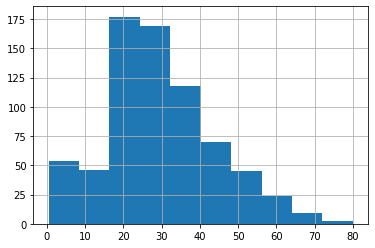

In [16]:
data['Age'].hist()

In [17]:
data['Age'].median()

28.0

In [18]:
data['Age'].fillna(data['Age'].median(), inplace=True)

### Merkmal Kabine (Cabin)

Aufgrund der sehr hohen Anzahl an fehlendenen Kabinen-Werten (77,1%) und der Annahme, dass der Kabinenname vermutlich wenig darüber aussagt, ob ein Passagier überlebt hat, wird die Spalte Kabine aus den Daten entfernt.


In [19]:
drop_column = ['Cabin']
data.drop(drop_column, axis=1, inplace = True)

### Entfernen von weiteren nicht relevanten Merkmalen

Bei den Merkmalen PassengerId, Name und Ticket wird angenommen, das es sich um zufällige eindeutige Identifikatoren handelt, die keinen Einfluss auf die Ergebnisvariable haben. Daher werden sie von der Analyse ausgeschlossen.

Entfernen der Merkmale PassengerId, Name und Ticket.

In [20]:
drop_column = ['PassengerId','Ticket','Name']
data.drop(drop_column, axis=1, inplace = True)

### Ergebnis

Es sollten jetzt keine fehlenden Werte in den Daten vorkommen. Dies kann mit den Methoden isna() und sum() geprüft werden.

In [21]:
data.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

Ausgabe der aufbereiteten Daten

In [22]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,28.0,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


### Speichern der aufbereiteten Daten

Die Daten werden nun für einen Zwischenstand abgespeichert. Die [to_pickle()-Methode](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_pickle.html)  speichert den Pandas-DatenFrame im Pickle-Format ab.

In [23]:
data.to_pickle('../output/titanic/preparedData.pkl')

Das Pickle-Format kann wie folgt eingelesen werden:

In [24]:
df = pd.read_pickle('../output/titanic/preparedData.pkl')

Ausgeben der eingelesenen Daten:

In [25]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,28.0,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


Im nächsten Abschnitt wird die Aufteilung der Daten in Datensets besprochen.